### Ядерная оценка плотности

$$ \hat{f_h}(x)=\frac{1}{nh}\sum_{i=1}^{n}K \left( \frac{x-x_i}{h} \right) $$

In [38]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [40]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<AxesSubplot: ylabel='Frequency'>

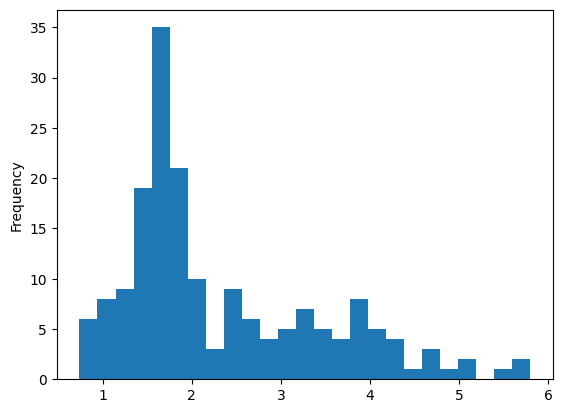

In [41]:
X['malic_acid'].plot.hist(bins=25)

In [44]:
def kernel_gaussian(x):
    return np.power(2*np.pi, -0.5) * np.exp(-0.5*np.power(x, 2))

In [45]:
from typing import Callable

class KernelDensityEstimation:
    
    
    def __init__(self, h: float, kernel_function: Callable) -> None:
        self.kernel = kernel_function
        self.window_size = h
        
    def fit(self, X):
        self.data = X.copy()
        
    def _transfrom_one(self, x):
        return (
            self.kernel((x - self.data) / self.window_size).sum() 
            / (self.data.shape[0] * self.window_size)
        )
    
    def transform(self, X):
        func = np.vectorize(self._transfrom_one)
        return func(X)
        

In [60]:
kde = KernelDensityEstimation(0.5, kernel_gaussian)

In [61]:
kde.fit(X[['malic_acid']].values)

In [62]:
X[['malic_acid']]

,malic_acid
0,1.71
1,1.78
2,2.36
3,1.95
4,2.59
...,...
173,5.65
174,3.91
175,4.28
176,2.59


In [63]:
kde_transformed = kde.transform(X[['malic_acid']].values)

In [64]:
kde_transformed

array([[0.43332055],
       [0.42909407],
       [0.28000308],
       [0.40063454],
       [0.22130859],
       [0.43079153],
       [0.41693181],
       [0.34487523],
       [0.43260248],
       [0.37849432],
       [0.34177174],
       [0.41224385],
       [0.43260756],
       [0.43260756],
       [0.41693181],
       [0.42584087],
       [0.40728277],
       [0.42684016],
       [0.42899814],
       [0.16158657],
       [0.43208762],
       [0.13854485],
       [0.41862825],
       [0.42992447],
       [0.42584087],
       [0.374711  ],
       [0.42999076],
       [0.43301436],
       [0.41136772],
       [0.43362924],
       [0.41615771],
       [0.43332223],
       [0.42321663],
       [0.42132146],
       [0.4270178 ],
       [0.42584087],
       [0.43260248],
       [0.43301401],
       [0.41615771],
       [0.12675962],
       [0.43332055],
       [0.13639658],
       [0.41329958],
       [0.12747728],
       [0.42999076],
       [0.12302283],
       [0.14710757],
       [0.433

In [65]:
mask = np.argsort(X['malic_acid'].values)

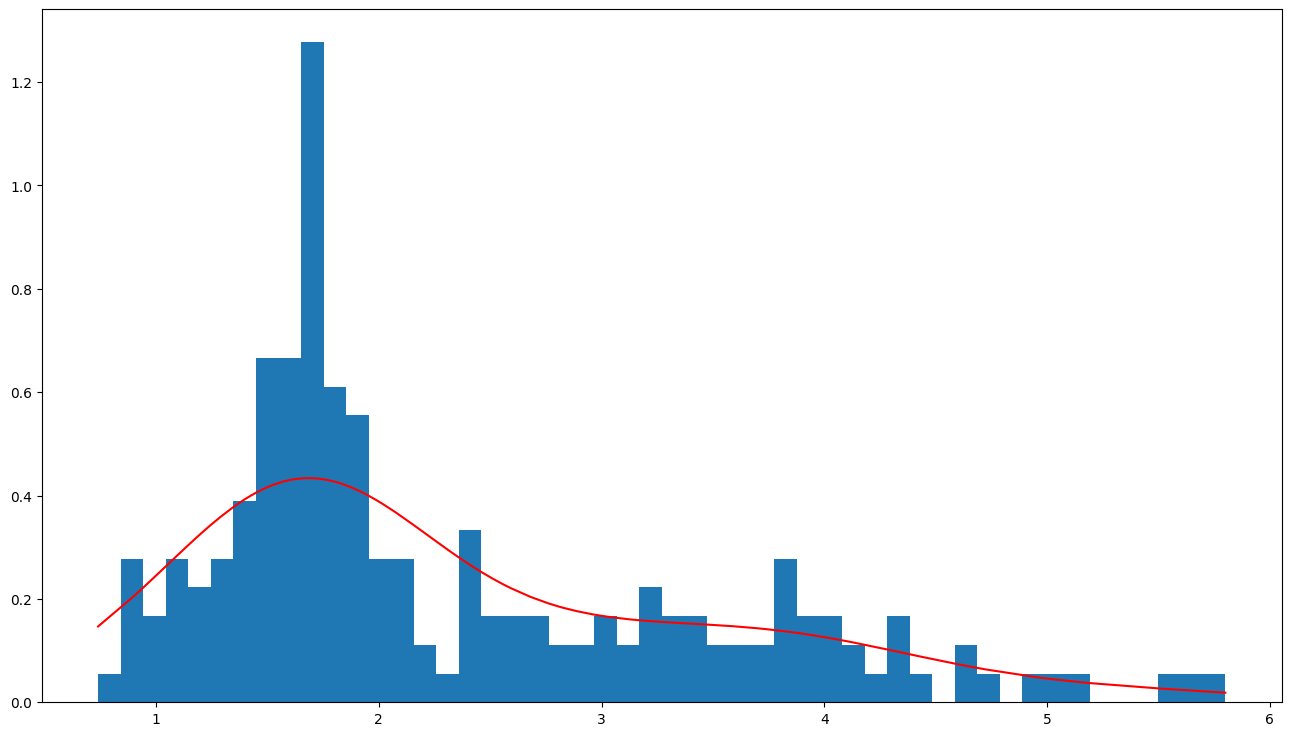

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))


ax.hist(x=X['malic_acid'].values, bins=50, density=True)
ax.plot(X['malic_acid'].values[mask], kde_transformed[mask], color='red')

#### Эмпирическое правило для гауссова ядра

$$h=\left( \frac{4\hat{\sigma}^5}{3n}\right)^{\frac{1}{5}} \approx 1.06\hat{\sigma}n^{-1\mathbin{/}5}$$

### Support Vector Machine

In [67]:
import pandas as pd

pd.options.display.max_colwidth = 500

In [68]:
data = pd.read_csv('IMDB Dataset.csv', sep=',')

In [69]:
data['sentiment'] = data['sentiment'].replace({'positive': 1, 'negative': 0})

In [70]:
data.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is calle...",1
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly wr...",1
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />T...",1
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ru...",0
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is conne...",1


In [73]:
from sklearn.feature_extraction.text import HashingVectorizer, CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score

In [74]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/a.gultiaev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
from nltk.corpus import stopwords

In [76]:
stops = stopwords.words('english')

In [77]:
X, y = data['review'], data['sentiment']

In [79]:
X.head()

0    One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is calle...
1    A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrifi

#### Удалим теги

In [80]:
import re

tag_regex = re.compile(r'\<br\s*\/\>')
def remove_tags(text):
    return tag_regex.sub(' ', text)

In [81]:
X.apply(remove_tags)

0        One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.  The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.  It is called OZ as that is the ...
1        A wonderful little production.   The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece.   The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written 

#### Удалим пунктуацию

In [82]:
punct_regex = re.compile(r'[\.\"\,\-\+\!\@\#\$\%\^\&\*\(\)\№\;\:\?\_\=\±\§\[\]\~\\/\<\>]+')

def remove_punct(text):
    return punct_regex.sub('', text)

In [83]:
X.apply(remove_punct)

0        One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked They are right as this is exactly what happened with mebr br The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordbr br It is called OZ as that is the nic...
1        A wonderful little production br br The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams' diary entries not only is it well worth the watching but it is a terrificly written and 

#### Разобъем текст на токены

In [14]:
from nltk.tokenize import word_tokenize

In [84]:
X[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
pymorphy2

In [86]:
word_tokenize(X[0])

['One',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 '1',
 'Oz',
 'episode',
 'you',
 "'ll",
 'be',
 'hooked',
 '.',
 'They',
 'are',
 'right',
 ',',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'Oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 ',',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'GO',
 '.',
 'Trust',
 'me',
 ',',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 '.',
 'This',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 ',',
 'sex',
 'or',
 'violence',
 '.',
 'Its',
 'is',
 'hardcore',
 ',',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'It',
 'is',
 'called',
 'OZ',
 'as',


#### Стемминг слов

In [88]:
from nltk.stem import SnowballStemmer

In [89]:
stemmer = SnowballStemmer('english')

In [90]:
list(map(stemmer.stem, word_tokenize(X[0])))

['one',
 'of',
 'the',
 'other',
 'review',
 'has',
 'mention',
 'that',
 'after',
 'watch',
 'just',
 '1',
 'oz',
 'episod',
 'you',
 'll',
 'be',
 'hook',
 '.',
 'they',
 'are',
 'right',
 ',',
 'as',
 'this',
 'is',
 'exact',
 'what',
 'happen',
 'with',
 'me.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'the',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'was',
 'it',
 'brutal',
 'and',
 'unflinch',
 'scene',
 'of',
 'violenc',
 ',',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go',
 '.',
 'trust',
 'me',
 ',',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'heart',
 'or',
 'timid',
 '.',
 'this',
 'show',
 'pull',
 'no',
 'punch',
 'with',
 'regard',
 'to',
 'drug',
 ',',
 'sex',
 'or',
 'violenc',
 '.',
 'it',
 'is',
 'hardcor',
 ',',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'it',
 'is',
 'call',
 'oz',
 'as',
 'that',
 'is',
 'the',
 'nicknam',
 

#### Препроцессинг

In [92]:
def preprocess_text(text):
    return remove_punct(remove_tags(text))

def tokenize_text(text):
    return list(map(stemmer.stem, filter(lambda x: x not in stops, word_tokenize(text))))

In [94]:
count_vec = CountVectorizer(lowercase=True, preprocessor=preprocess_text, tokenizer=tokenize_text, 
                            max_features=20000)
tfidf_vec = TfidfVectorizer(lowercase=True, preprocessor=preprocess_text, tokenizer=tokenize_text, 
                            max_features=20000)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, 
                                                    random_state=42)

In [ ]:
SVC()

In [27]:
pipe = Pipeline([
    ('extract_features', count_vec),
    ('clf', LinearSVC())
])

In [32]:
cv = KFold(n_splits=5)
cross_val_score(pipe, X_train, y_train, cv=cv, scoring='f1_score', verbose=9, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/

array([0.9225346 , 0.91968297, 0.92863518, 0.92756962, 0.93113596])

In [36]:
preds = pipe.predict(X_test)

In [37]:
f1_score(y_test, preds)

0.8616829902058765